In [29]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt #importing libraries

In [30]:
def load_images_from_folder(folder): #load the roi images
    ildimg = []
    for i in range(0,600):
        filename = str(i)+".jpg"
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            ildimg.append(img)
    return ildimg

In [31]:
ildimg = load_images_from_folder("roi_images")

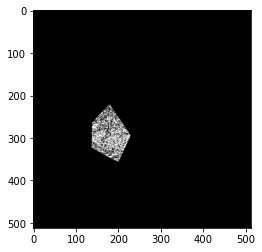

In [32]:
plt.imshow(ildimg[179], cmap=plt.cm.bone)
plt.show()

In [33]:
ildimg_gray = []
for i in range(600):    
    ildimg_gray.append(cv2.cvtColor(ildimg[i], cv2.COLOR_BGR2GRAY))

In [34]:
def crop(img, tol=0):
    mask = img>tol
    m,n = img.shape
    mask0,mask1 = mask.any(0),mask.any(1)
    col_start,col_end = mask0.argmax(), n-mask0[::-1].argmax()
    row_start,row_end = mask1.argmax(),m-mask1[::-1].argmax()
    cropped = img[row_start:row_end,col_start:col_end]
    return cropped

In [35]:
roi_outscribe = []
for i in range (600):
    a = crop(ildimg_gray[i])
    roi_outscribe.append(a)
    
roi_outscribe = np.asarray(roi_outscribe)

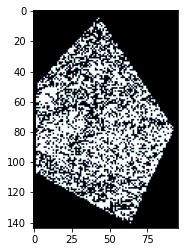

In [36]:
plt.imshow(roi_outscribe[179], cmap=plt.cm.bone)
plt.show()

In [37]:
final = []
for i in range(600):
    roi_outscribe[i] = np.asarray(roi_outscribe[i])
    final.append(cv2.resize(roi_outscribe[i],(64,64),interpolation=cv2.INTER_AREA))

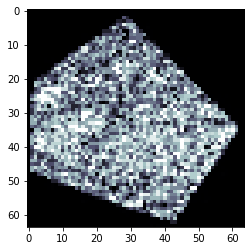

In [38]:
plt.imshow(final[179], cmap=plt.cm.bone)
plt.show()

In [39]:
final = np.asarray(final)
final.shape

(600, 64, 64)

In [40]:
path = './roi_outscribe_64' #saving these images in a folder
for i in range(len(final)):
    cv2.imwrite(os.path.join(path,str(i)+'.jpg'), final[i])
    cv2.waitKey(0)